In [2]:
import pickle
import os

files = '''
Greed/NoValidation, Greed/Validation, Greed/Random, Greed/Validation50FeatDP5DP2, Greed/RandomValidation50FeatDP5DP2, Gcn/GcnValidation, 
Gcn/GcnValidationGreedy, Gcn/GcnValidation50DP5, Greed/Validation2ndBest, Greed/Validation2ndBest50DP5DP2, Greed/GenderValidation,
Greed/GenderRandomValidation, Greed/GenderValidation2ndBest, Gcn/GenderGcnValidation, Gcn/GenderGcn50FeatDP5, Greed/GenderValidation50FeatDP0,
Greed/GenderValidation50FeatDP5DP2, Greed/GenderRandom50FeatDP5DP2, Greed/Gender2ndBest50FeatDP5DP2, Greed/WratValidationDP2,
Greed/WratValidation50FeatDP5DP2, Greed/RandomWratValidation50FeatDP5DP2, Greed/RandomWratValidationDP2, Greed/WratValidation2ndBestDP2,
Greed/WratValidation2ndBest50FeatDP5DP2, Gcn/WratGcn50FeatDP5, Gcn/WratGcn
'''

files = [file.strip() for file in files.split(',')]
vrs = globals()

for file in files:
    with open(f'../../Work/LatentSim/{file}.pkl', 'rb') as f:
#         print(os.path.basename(file))
        vrs[os.path.basename(file)] = pickle.load(f)
    
print('Complete')
# print(NoValidation)

Complete


/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScr

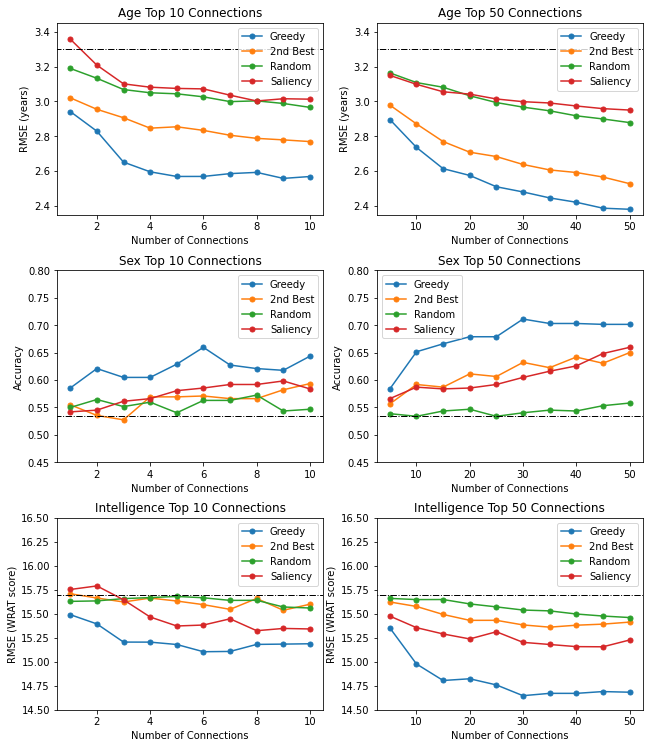

In [3]:
import numpy as np
import matplotlib.pyplot as plt

nv = np.sum(NoValidation[1][:,:,2], axis=0)/10/12
v = np.sum(Validation[1][:,:,2], axis=0)/10/12
r = np.sum(Random[1][:,:,2], axis=0)/10/12
vgcn = np.sum(GcnValidation, axis=0)/10/12
vgcng = np.sum(GcnValidationGreedy, axis=0)/10/12
v2 = np.sum(Validation2ndBest[1][:,:,2], axis=0)/10/12

v50 = np.sum(Validation50FeatDP5DP2[1][:,:,2], axis=0)/10/12
r50 = np.sum(RandomValidation50FeatDP5DP2[1][:,:,2], axis=0)/10/12
vgcn50 = np.sum(GcnValidation50DP5, axis=0)/10/12
v250 = np.sum(Validation2ndBest50DP5DP2[1][:,:,2], axis=0)/10/12

genv = np.sum(GenderValidation[1][:,:,2], axis=0)/10
genr = np.sum(GenderRandomValidation[1][:,:,2], axis=0)/10
genv2 = np.sum(GenderValidation2ndBest[1][:,:,2], axis=0)/10
gengcn = np.sum(GenderGcnValidation, axis=0)/10

genv50 = np.sum(GenderValidation50FeatDP5DP2[1][:,:,2], axis=0)/10
genr50 = np.sum(GenderRandom50FeatDP5DP2[1][:,:,2], axis=0)/10
gengcn50 = np.sum(GenderGcn50FeatDP5, axis=0)/10
genv250 = np.sum(Gender2ndBest50FeatDP5DP2[1][:,:,2], axis=0)/10

wratv = np.sum(WratValidationDP2[1][:,:,2], axis=0)/10
wratr = np.sum(RandomWratValidationDP2[1][:,:,2], axis=0)/10
wratv2 = np.sum(WratValidation2ndBestDP2[1][:,:,2], axis=0)/10
wratgcn = np.sum(WratGcn, axis=0)/10

wratv50 = np.sum(WratValidation50FeatDP5DP2[1][:,:,2], axis=0)/10
wratv250 = np.sum(WratValidation2ndBest50FeatDP5DP2[1][:,:,2], axis=0)/10
wratr50 = np.sum(RandomWratValidation50FeatDP5DP2[1][:,:,2], axis=0)/10
wratgcn50 = np.sum(WratGcn50FeatDP5, axis=0)/10

idcs = np.arange(1,11)
idcs50 = 5*idcs

def moveDown(ax, amt):
    box = ax.get_position()
    box.y0 -= amt
    box.y1 -= amt
    ax.set_position(box)

fig, ax = plt.subplots(3,2,figsize=(10.5,12))

moveDown(ax[1,0], 0.1/5)
moveDown(ax[1,1], 0.1/5)
moveDown(ax[2,0], 0.2/5)
moveDown(ax[2,1], 0.2/5)

ax = ax.T

ax[0,0].plot(idcs, v, label='Greedy', marker='.', markersize=10)
ax[0,0].plot(idcs, v2, label='2nd Best', marker='.', markersize=10)
ax[0,0].plot(idcs, r, label='Random', marker='.', markersize=10)
ax[0,0].plot(idcs, vgcn, label='Saliency', marker='.', markersize=10)
# ax[0].plot(idcs, vgcng, label='GCN Greedy', marker='.', markersize=10)

ax[0,0].set_title('Age Top 10 Connections')
ax[0,0].legend()
ax[0,0].set_xlabel('Number of Connections')
ax[0,0].set_ylabel('RMSE (years)')
ax[0,0].set_ylim(2.35,3.45)
# ax[0].set_ylim(2.35,3.45)
# ax[0].text(1,16.2,'0 DP')

ax[1,0].plot(idcs50, v50, label='Greedy', marker='.', markersize=10)
ax[1,0].plot(idcs50, v250, label='2nd Best', marker='.', markersize=10)
ax[1,0].plot(idcs50, r50, label='Random', marker='.', markersize=10)
ax[1,0].plot(idcs50, vgcn50, label='Saliency', marker='.', markersize=10)

ax[1,0].set_title('Age Top 50 Connections')
ax[1,0].legend()
ax[1,0].set_xlabel('Number of Connections')
ax[1,0].set_ylabel('RMSE (years)')
ax[1,0].set_ylim(2.35,3.45)
# ax[1].set_ylim(2.35,3.45)
# ax[1].text(5,16.2,'0.5 Feat DP\n0.2 Conn DP')

ax[0,1].plot(idcs, genv, label='Greedy', marker='.', markersize=10)
ax[0,1].plot(idcs, genv2, label='2nd Best', marker='.', markersize=10)
ax[0,1].plot(idcs, genr, label='Random', marker='.', markersize=10)
ax[0,1].plot(idcs, gengcn, label='Saliency', marker='.', markersize=10)
# ax[0].plot(idcs, vgcng, label='GCN Greedy', marker='.', markersize=10)

ax[0,1].set_title('Sex Top 10 Connections')
ax[0,1].legend()
ax[0,1].set_xlabel('Number of Connections')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].set_ylim(0.45,0.8)
# ax[0].set_ylim(2.35,3.45)
# ax[0].text(1,16.2,'0 DP')

ax[1,1].plot(idcs50, genv50, label='Greedy', marker='.', markersize=10)
ax[1,1].plot(idcs50, genv250, label='2nd Best', marker='.', markersize=10)
ax[1,1].plot(idcs50, genr50, label='Random', marker='.', markersize=10)
ax[1,1].plot(idcs50, gengcn50, label='Saliency', marker='.', markersize=10)

ax[1,1].set_title('Sex Top 50 Connections')
ax[1,1].legend()
ax[1,1].set_xlabel('Number of Connections')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].set_ylim(0.45,0.8)
# ax[1].set_ylim(2.35,3.45)
# ax[1].text(5,16.2,'0.5 Feat DP\n0.2 Conn DP')

ax[0,2].plot(idcs, wratv, label='Greedy', marker='.', markersize=10)
ax[0,2].plot(idcs, wratv2, label='2nd Best', marker='.', markersize=10)
ax[0,2].plot(idcs, wratr, label='Random', marker='.', markersize=10)
ax[0,2].plot(idcs, wratgcn, label='Saliency', marker='.', markersize=10)
# ax[0].plot(idcs, vgcng, label='GCN Greedy', marker='.', markersize=10)

ax[0,2].set_title('Intelligence Top 10 Connections')
ax[0,2].legend()
ax[0,2].set_xlabel('Number of Connections')
ax[0,2].set_ylabel('RMSE (WRAT score)')
ax[0,2].set_ylim(14.5,16.5)
# ax[0].set_ylim(2.35,3.45)
# ax[0].text(1,16.2,'0 DP')

ax[1,2].plot(idcs50, wratv50, label='Greedy', marker='.', markersize=10)
ax[1,2].plot(idcs50, wratv250, label='2nd Best', marker='.', markersize=10)
ax[1,2].plot(idcs50, wratr50, label='Random', marker='.', markersize=10)
ax[1,2].plot(idcs50, wratgcn50, label='Saliency', marker='.', markersize=10)

ax[1,2].set_title('Intelligence Top 50 Connections')
ax[1,2].legend()
ax[1,2].set_xlabel('Number of Connections')
ax[1,2].set_ylabel('RMSE (WRAT score)')
ax[1,2].set_ylim(14.5,16.5)
# ax[1].set_ylim(2.35,3.45)
# ax[1].text(5,16.2,'0.5 Feat DP\n0.2 Conn DP')

ax[0,0].set_xlim([0.5,10.5])
ax[1,0].set_xlim([2.5,52.5])
ax[0,1].set_xlim([0.5,10.5])
ax[1,1].set_xlim([2.5,52.5])
ax[0,2].set_xlim([0.5,10.5])
ax[1,2].set_xlim([2.5,52.5])

ax[0,0].plot([0,11],[3.3,3.3], color='black', linestyle='-.', linewidth=1)
ax[1,0].plot([-5,55],[3.3,3.3], color='black', linestyle='-.', linewidth=1)
ax[0,1].plot([0,11],[0.535,0.535], color='black', linestyle='-.', linewidth=1)
ax[1,1].plot([-5,55],[0.535,0.535], color='black', linestyle='-.', linewidth=1)
ax[0,2].plot([0,11],[15.7,15.7], color='black', linestyle='-.', linewidth=1)
ax[1,2].plot([-5,55],[15.7,15.7], color='black', linestyle='-.', linewidth=1)

fig.show()
# fig.savefig('../../Work/LatentSim/Final/FigureFeatureSection2.eps', bbox_inches='tight')

In [40]:
Validation[0].shape

(10, 10, 2, 5, 2)